# 1.1 Conceitos básicos e Aritmética de Ponto Flutuante

## Introdução
De modo geral, a resolução de um problema de engenharia passa necessariamente por 3 etapas distintas
1. observação e entendimento do(s) fenômeno(s) envolvido(s);
2. construção de um modelo matemático que represente o problema;
3. a resolução do modelo matemático por métodos numéricos ou analíticos.

As duas primeiras etapas consistem na **fase de modelagem** e a terceira é a **fase de resolução**. Tanto na fase de modelagem quanto na fase de resolução podem ocorrer erros, mesmo que esses erros não tornem a resposta obtida inválida ou inútil. 

Os erros na fase de modelagem podem ser decorrentes de medições imprecisas, erros de anotação, simplificações e deduções equivocadas. Os erros na fase de resolução ocorrem devido a erros de cálculo, escolha de um método ineficiente, aproximações ou processamento numérico. Dizemos que métodos analíticos de resolução geram soluções exatas e métodos numéricos geram soluções aproximadas. 

Nem sempre é fácil ou possível obter a solução analítica de um modelo matemático, ainda que simples, por exemplo:

1. $$x^3-30x+2552=0 $$ <br>

2. $$cos(x)=x $$ <br>

3. $$xe^x=10 $$ <br>

4. $$\begin{cases} y'+xy = e^{-y}\\
                    y(0) =2
                    \end{cases} $$ <br>
          
5. $$ \int^2_1 e^{-x^2} dx $$ <br>

A maioria dos problemas envolvendo fenômenos reais produzem modelos matemáticos cuja solução analítica é difícil (ou impossível) de obter, mesmo quando provamos que a solução existe. Nesses casos usamos **métodos numéricos**, os quais fornecem **soluções aproximadas**, que apesar de, em geral, serem diferentes da solução exata, podem ser suficientemete próximas para que sejam úteis em aplicações práticas.  





### EXEMPLO 1###
Uma esfera de madeira (densidade relativa $\mu_e =0,638$ e raio $r=10 cm$) é colocada a flutuar sobre a água (densidade relativa $\mu=1$), conforme figura. Qual é a altura $d$ da esfera que ficará submersa? 

![esfera.png](https://github.com/tiagoburiol/NUMETHODS/raw/master/1_INTRODUCAO_ERROS/imagens/esfera.png
)

### Solução###
Inicialmente, observemos que, pelo *Princípio de Arquimedes* o peso da esfera deve ser equilibrado com o peso do volume de água deslocada 

$$ M_e g = M_a g $$

$$ \mu_e \frac{4 \pi r^3}{3} = \mu_a \int_0^d \pi \left[r^2-(x-r)^2) \right]dx $$

$$ \mu_e \frac{4 \pi r^3}{3} = \mu_a \frac{\pi d^2 (3r-d)}{3}$$

$$ 4 \mu_e r^3 = \mu_a d^2 (3r-d)$$

substituindo os valores obtemos 

$$ d^3-30d^2+2552=0$$.

A solução analítica para esse problema pode ser encontrada mas é um tanto complicada. No entanto, com uma rotina podemos encontrar uma aproximação numericamente. 

Sabemos que a solução é um numero entre 0 e 20, então calculamos os valores da função $ f(d) = d^3-30d^2+2552 $ para valores entre 0 e 20 obtendo:


In [4]:
for d in range(20):
    print (d, d**3-30*d**2+2552)

0 2552
1 2523
2 2440
3 2309
4 2136
5 1927
6 1688
7 1425
8 1144
9 851
10 552
11 253
12 -40
13 -321
14 -584
15 -823
16 -1032
17 -1205
18 -1336
19 -1419


Observemos que a função moda de sinal entre $d=11$ e $d=12$, então podemos refinar a aproximação gerando alguns valores entre 11 e 12.

In [6]:
for x in range(10):
    d = 11+x*0.1
    print (d, d**3-30*d**2+2552)

11.0 253.0
11.1 223.33100000000013
11.2 193.72800000000007
11.3 164.19700000000012
11.4 134.7439999999997
11.5 105.375
11.6 76.09599999999955
11.7 46.912999999999556
11.8 17.831999999999425
11.9 -11.141000000000076


Observemos que a função muda de sinal entre $d=11.8$ e $d=11.9$, então podemos refinar a aproximação gerando alguns valores.

In [7]:
for x in range(10):
    d = 11.8+x*0.01
    print (d, d**3-30*d**2+2552)

11.8 17.831999999999425
11.81 14.929740999999922
11.82 12.028567999999723
11.83 9.128486999999495
11.84 6.229503999999906
11.850000000000001 3.3316249999998035
11.860000000000001 0.43485599999894475
11.870000000000001 -2.4607969999997295
11.88 -5.355328000000554
11.89 -8.248731000000134


Assim, podemos tomar como uma solução aproximada o ponto médio entre 11.86 e 11.87 que resolta em $d=11.865 cm$ com erro inferior a 0.005.

### EXEMPLO 2

Um corpo em queda livre pode ser descrito pelo modelo matemático

$$ \frac{dv}{dt} = \frac{F}{m}$$

derivado da 2ª Lei de Newton $F=ma$. A força #F# atuante sobre o corpo composta pela soma de duas forças de mesma direção e sentidos opostos, a força gravitacional para baixo ($F_D$) e a força da resistência do ar para cima ($F_U$). Então

$$ \frac{dv}{dt} = \frac{(F_D+F_U)}{m}$$

como $F_D = mg$, com $m$ massa e $g$ aceleração da gravidade, e $F_U=-cv$, com $c$ sendo uma constante que depende das características do corpo em queda livre e $v$ a velocidade instantânea. Então

$$ \frac{dv}{dt} = \frac{mg-cv}{m}$$

ou

$$ \frac{dv}{dt} = g-\frac{c}{m}v$$

O modelo então consiste em uma equação diferencial cuja solução pode ser obtida analitivamente. Se o corpo em queda livre entrou em movimento a partir do repouso, ou seja, $v=0$ em $t=0$, a sulução analítica é dada por

$$ v(t) = gm(1-e^{(-c/m)t})$$

Se considerarmos $m=61,8kg$ entrando em movimento de queda livre a partir do repouso $v(t)=0$ em $t=0$ e o coeficiente de arrasto $c=12.5k g/s$, a solução fica

$$v(t)=\frac{9,81(68,1)}{12,5}(1-e^{(-12,5/68,1)t} = 53,44(1-e^{-0,18355t})$$

Assim, podemos obter o valor da velocidade para qualquer instante $t$. Tomando valores de $t$ de a cada 2 segundos, e calculando a velocidade a partir de $t=0$ obtemos


[ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46
 48]
[ 0.         16.41995476 27.79472025 35.67447948 41.13310679 44.91451827
 47.53405465 49.34871325 50.60580051 51.47663561 52.07989823 52.4978026
 52.78730183 52.98784963 53.12677718 53.22301791 53.28968775 53.33587264
 53.36786677 53.3900304  53.40538404 53.41602013 53.42338817 53.42849232
 53.43202816]


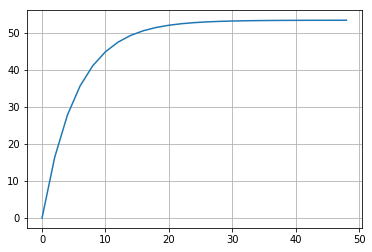

In [15]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0,50, 2)
v = lambda t: 53.44*(1-np.exp(-0.18355*t))
print (t)
print (v(t))
plt.plot(t, v(t))
plt.grid()
plt.show()


Por outro lado, supondo que a solução analítica não fosse conhecida (ou que fosse impossível obtê-la), poderíamos encontrar uma solução aproximada numericamente. Para isso podemos aproximar a derivada $\frac{dv}{dt}$ por

$$ \frac{dv}{dt} \cong \frac{\Delta v}{\Delta t} = \frac{v(t_{i+1}-v(t_i))}{t_{i+1}-t_{i}} $$

então 

$$ \frac{v(t_{i+1}-v(t_i))}{t_{i+1}-t_{i}} = gm(1-e^{(-c/m)t})$$

que pode ser reescrita como

$$ v(t_{i+1}) = v(t_i) + \left[ g-\frac{c}{m} v(t_i) \right] (t_{i+1}-t_{i})$$

e ser usada para obter os valores de $v$ para cada instante $t_i$, $i=0,2,4,6,...$, a partir do instante inicial $t_0=0$.

[ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46
 48]
[19.62, 32.037356828193836, 39.89621261813736, 44.87002590075947, 48.01791653924718, 50.01019387432531, 51.2710918646611, 52.069105130204015, 52.574161984020456, 52.89380883276478, 53.09611102337976, 53.22414662419483, 53.305179434695994, 53.356464517406714, 53.38892247724272, 53.40946488647814, 53.42246602947442, 53.43069435932962, 53.43590201008968, 53.439197894785096, 53.441283836493945, 53.442604013992494, 53.44343954483225, 53.44396834628884, 53.44430302092583]


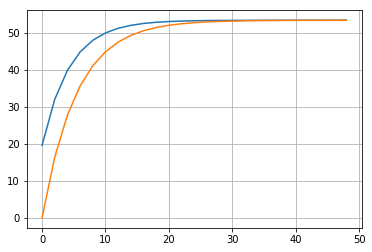

In [40]:
import numpy as np
import matplotlib.pyplot as plt

tempos = np.arange(0,50, 2)

v_aprox = []
v_ant = 0.

for t in tempos:
    result = v_ant + (9.81 - (12.5/68.1)*v_ant)*2
    v_aprox.append(result)
    v_ant = result
    
print (tempos)
print (v_aprox)

v = lambda t: 53.44*(1-np.exp(-0.18355*t))

plt.plot(tempos, v_aprox, tempos, v(tempos))
plt.grid()
plt.show()